=== 단기 수익률 기준 문재인 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
에이엔피        0.418046
유성티엔에스      0.332723
우리들제약       0.207816
화인베스틸       0.156417
조광페인트       0.156174
신일산업        0.006253
바른손         0.003519
대한제강       -0.043046
디오         -0.128017
국보디자인      -0.344871
Name: KODEX200, dtype: float64


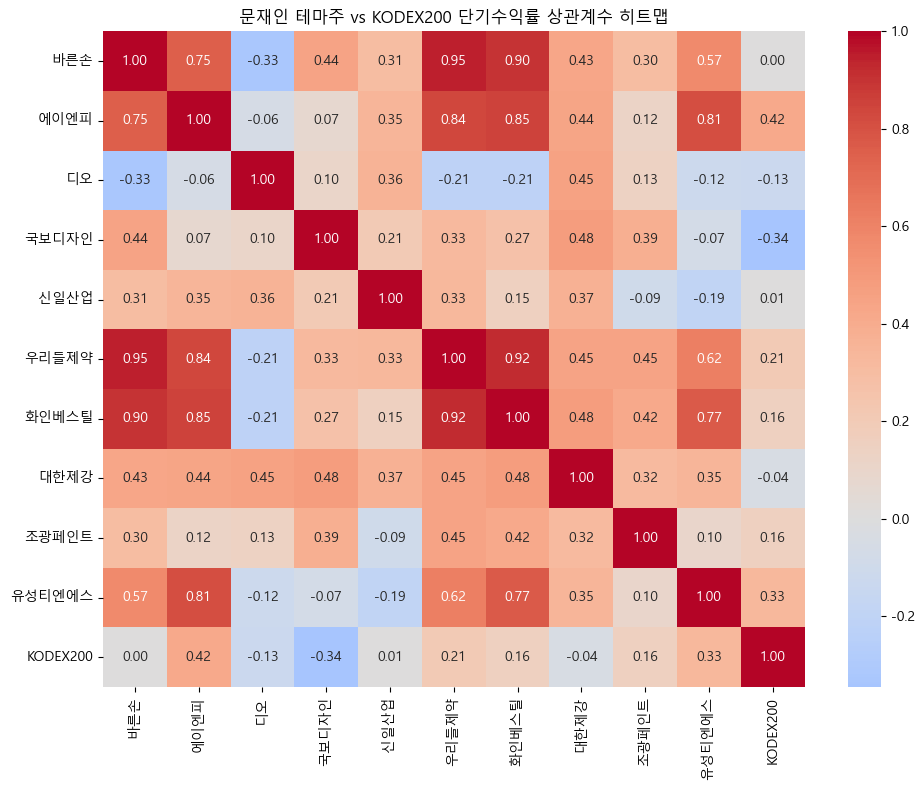

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 날짜 설정
start_date = '2017-03-24'
end_date = '2017-04-13'

# 종목 코드 → 종목명 매핑
label_dict = {
    'thema1': '바른손',
    'thema2': '에이엔피',
    'thema3': '디오',
    'thema4': '국보디자인',
    'thema5': '신일산업',
    'thema6': '우리들제약',
    'thema7': '화인베스틸',
    'thema8': '대한제강',
    'thema9': '조광페인트',
    'thema10': '유성티엔에스'
}

# 테마주 종가 수집
thema = pd.DataFrame()
thema['thema1'] = fdr.DataReader('018700', start=start_date, end=end_date)['Close']
thema['thema2'] = fdr.DataReader('015260', start=start_date, end=end_date)['Close']
thema['thema3'] = fdr.DataReader('039840', start=start_date, end=end_date)['Close']
thema['thema4'] = fdr.DataReader('066620', start=start_date, end=end_date)['Close']
thema['thema5'] = fdr.DataReader('002700', start=start_date, end=end_date)['Close']
thema['thema6'] = fdr.DataReader('004720', start=start_date, end=end_date)['Close']
thema['thema7'] = fdr.DataReader('133820', start=start_date, end=end_date)['Close']
thema['thema8'] = fdr.DataReader('084010', start=start_date, end=end_date)['Close']
thema['thema9'] = fdr.DataReader('004910', start=start_date, end=end_date)['Close']
thema['thema10'] = fdr.DataReader('024800', start=start_date, end=end_date)['Close']

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 문재인 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("문재인 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
